## SGD vs Adam

It seems SGD converges much slowly than Adam

In [1]:
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from ge_maml import *

<IPython.core.display.Javascript object>


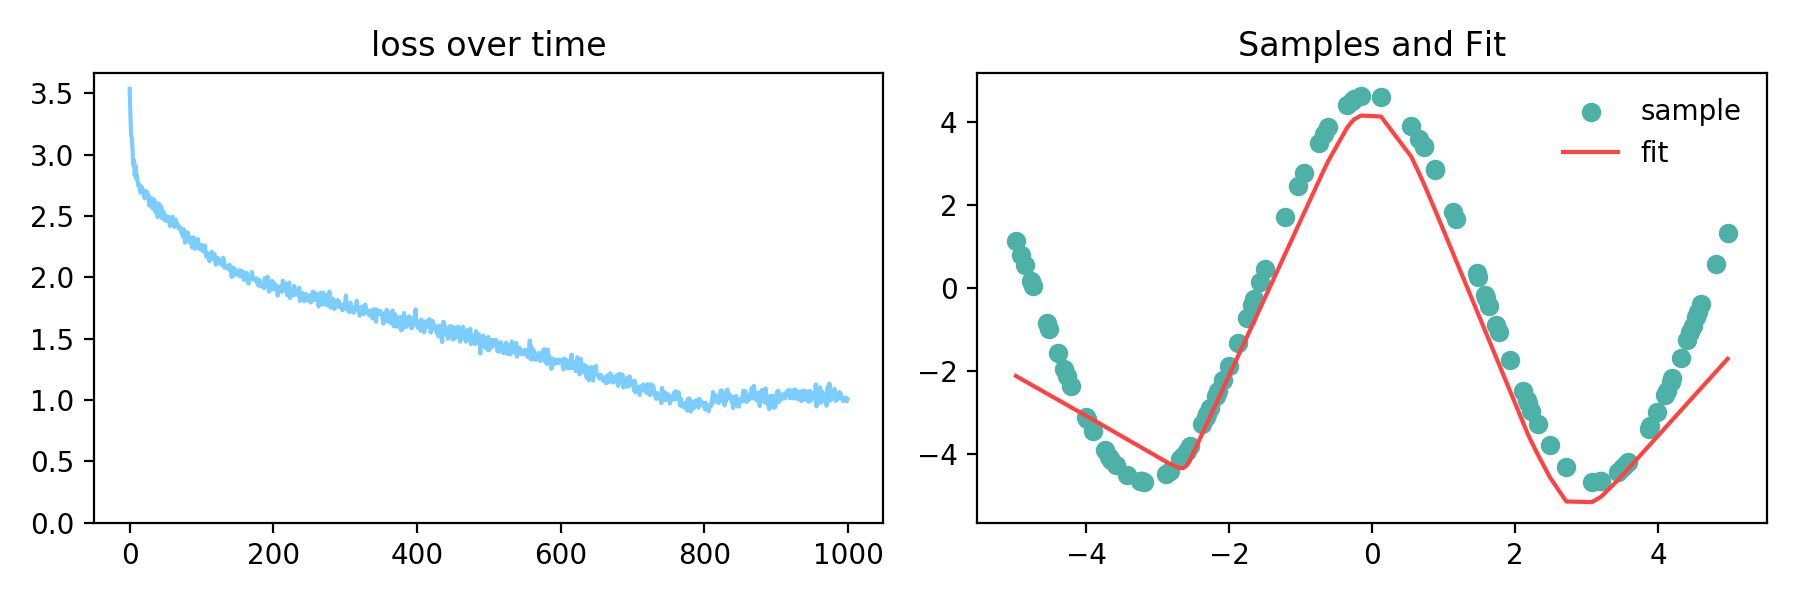

In [5]:
%matplotlib notebook
logging = dict(logger=defaultdict(list), fig=plt.figure(figsize=(9, 3)))

In [6]:
from ge_maml import *
model = Model(input_n=1, output_n=1, optimizer='SGD')
M.start(silent=False)
regular_sgd_baseline(model, Problem, n_epochs=1000, batch_n=10, k_shot=100, final_figure=None, **logging)
M.split()

Timer Started


2464/|/ 25%|| 2464/10000 [01:00<03:03, 41.06it/s] Lap Time: 18.0617s


In [20]:
log = defaultdict(lambda: defaultdict(list))

In [21]:
from ge_maml import *

model = Model(input_n=1, output_n=1, optimizer='SGD')
for i in tnrange(20, desc='SGD'):
    regular_sgd_baseline(model, Problem, n_epochs=500, batch_n=10, k_shot=100, logger=log['SGD {:03}'.format(i)])

model = Model(input_n=1, output_n=1, optimizer='Adam')
for i in tnrange(20, desc='Adam'):
    regular_sgd_baseline(model, Problem, n_epochs=500, batch_n=10, k_shot=100, logger=log['Adam {:03}'.format(i)])

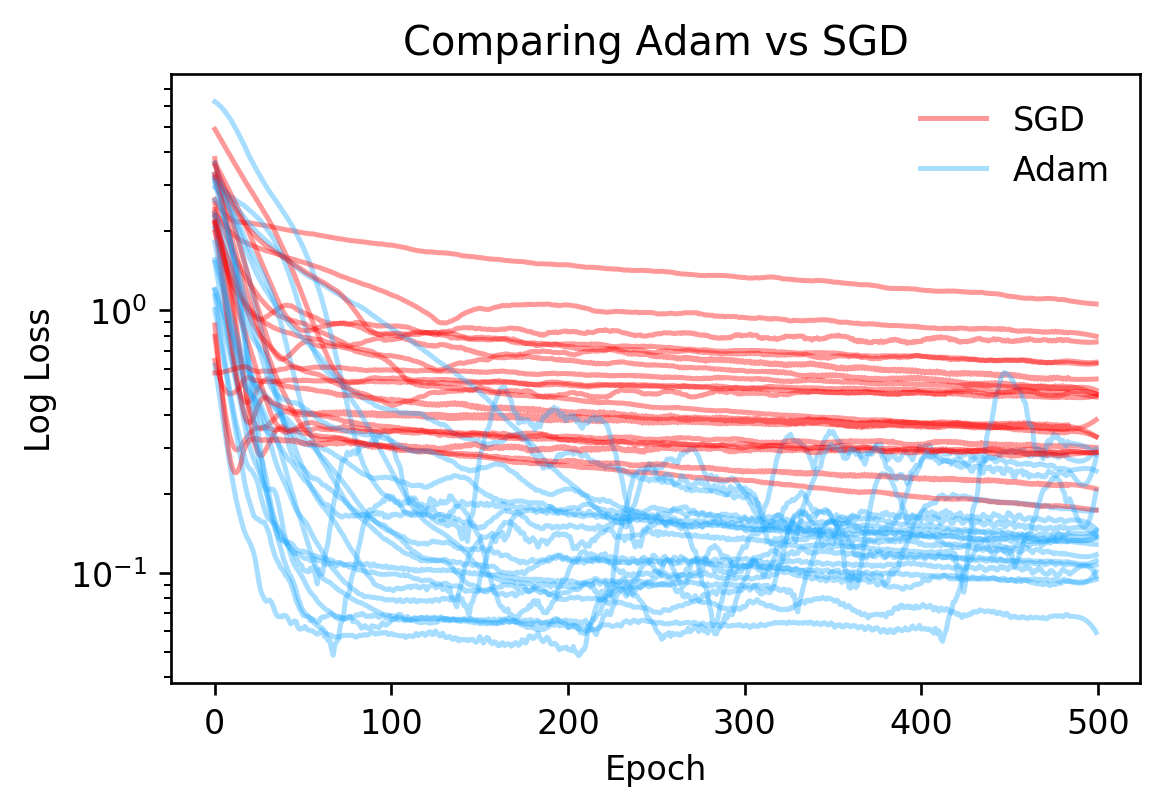

In [36]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from matplotlib.legend_handler import HandlerLine2D
from scipy import signal
fig = plt.figure(figsize=(5, 3.5), dpi=120)
axes = {}
for exp_key, run in log.items():
    prefix, *_ = exp_key.split()
    loss = np.array(run['loss']).squeeze(axis=-1)
    smoothed = signal.savgol_filter(loss, 31, 3)
    axes[prefix], = plt.plot(smoothed, label=prefix, alpha=0.4, color='red' if prefix == "SGD" else "#23aaff")

plt.title('Comparing Adam vs SGD')
plt.ylabel('Log Loss')
plt.xlabel('Epoch')
#plt.ylim(-0.15, 2.0)
plt.yscale('log')
plt.legend(handles=[v for k, v in axes.items()], framealpha=1, edgecolor='none')
plt.tight_layout()
plt.show();